# Deep Learning with Tensorflow on Amazon SageMaker and S3



## Imports

In [38]:
import sagemaker

print(sagemaker.__version__)
sess = sagemaker.Session()
# role = sagemaker.get_execution_role()
import os
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sagemaker.inputs import FileSystemInput
import boto3
import pandas as pd
import matplotlib.pyplot as plt

2.31.1


In [39]:
tf.__version__

'2.4.1'

## Train on the notebook on local machine

In [6]:
from sagemaker.tensorflow import TensorFlow

# put these files in the respective training folder
training_file = "labels_test_v1_m.csv"
validation_file = "val_labels_m.csv"

tf_estimator = TensorFlow(entry_point='train_no_s3.py', 
                          role="arn:aws:iam::963659202518:role/service-role/AmazonSageMaker-ExecutionRole-20210306T191865",
                          instance_count=1, 
                          instance_type='local',
                          framework_version='2.4.1', 
                          base_job_name='pc-tf-custom-container-test-job',
                          output_path='s3://canopy-production-ml-output',
                          py_version='py37',
                          script_mode=True,
                          hyperparameters={'training_file':training_file, 
                                           'validation_file': validation_file,
#                                            'bucket':"margaux-bucket-us-east-1",
                                           'epochs': 2, 'augment': True, 'batch-size': 100,
                                           'learning-rate': 0.01, 'numclasses': 10,
                                           'wandb_key': "abfa0dec9fc06fbfa6392496f40a22a8d47e58cf",
                                           's3_chkpt_dir':"ckpt",
                                           'bands': "2 3 4 8 12",
                                           'starting_checkpoint':"ckpt/pc-tf-custom-container-test-job-RGBNIRN-2021-03-15-22-45-06-142/model_resnet_epoch_7.h5"}
                         )
                                            

Training

In [5]:
import time
t0 = time.time()
tf_estimator.fit("file:///Users/purgatorid/Documents/GitHub/Project Canopy/cb_feature_detection/model-development/data")
t1 = time.time()
total = (t1-t0) / 60
print(f"{total} min")

Creating network "sagemaker-local" with the default driver
Creating g0zhkp446s-algo-1-duwzu ... 
Attaching to g0zhkp446s-algo-1-duwzu2mdone
g0zhkp446s-algo-1-duwzu | 2021-03-24 02:40:31.880169: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
g0zhkp446s-algo-1-duwzu | 2021-03-24 02:40:31.882746: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
g0zhkp446s-algo-1-duwzu | 2021-03-24 02:40:31.928211: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
g0zhkp446s-algo-1-duwzu | 2021-03-24 02:40:34,195 sagemaker-training-toolkit INFO     Imported framework sagemaker_tensorflow_container.training
g0zhkp446s-algo-1-duwzu | 2021-03-24 02:40:34,207 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
g0zhkp446s-algo-1-duwzu | 2021-

RuntimeError: Failed to run: ['docker-compose', '-f', '/private/var/folders/cz/s5n0rss95_d_fkgnjz19kgbr0000gn/T/tmpfdyykckx/docker-compose.yaml', 'up', '--build', '--abort-on-container-exit'], Process exited with code: 1

## Train on Cloud Amazon SageMaker

Training

In [31]:
from sagemaker.tensorflow import TensorFlow
from sagemaker.debugger import Rule, rule_configs
from sagemaker import get_execution_role

training_file = "labels_train.csv"
validation_file = "labels_val.csv"
tf_estimator = TensorFlow(entry_point='train_no_s3.py', 
                          role="arn:aws:iam::963659202518:role/service-role/AmazonSageMaker-ExecutionRole-20210306T191865",
                          #                           role=get_execution_role(),
                          train_instance_count=1, 
                          train_instance_type='ml.p3.2xlarge', # ml.m5.large, ml.p3.16xlarge, ml.p3.2xlarge, ml.g4dn.xlarge, ml.p3.8xlarge, p3.2xlarge, ml.t2.micro
                          framework_version='2.4', 
                          base_job_name='pc-tf-custom-container-test-job-RGBNIRN',
                          output_path='s3://canopy-production-ml-output',
                          py_version='py37',
                          checkpoint_s3_uri="s3://canopy-production-ml-output/ckpt/pc-tf-custom-container-test-job-RGBNIRN",
                          script_mode=True,
                          train_use_spot_instances=True,        # Use spot instance
                          train_max_run=432000,                    # Max training time
                          train_max_wait=450000,                  # Max training time + spot waiting time
                          hyperparameters={'training_file':training_file, 
                                           'validation_file': validation_file,
#                                            'bucket':"margaux-bucket-us-east-1",
                                           'epochs': 5, 'augment': True, 'batch-size': 100,
                                           'learning-rate': 0.001, 'numclasses': 10,
                                           'wandb_key': "6607ed7a49b452c2f3494ce60f9514f6c9e3b4e6",
                                           's3_chkpt_dir':"ckpt",
                                           'bands': "2 3 4 8 12",
                                          'starting_checkpoint':None
                                          }
                         )



train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
tf_estimator.fit("s3://canopy-production-ml/chips/cloudfree-merge-polygons/split/")


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'create_image_uri' will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2021-03-22 22:33:23 Starting - Starting the training job...
2021-03-22 22:33:24 Starting - Launching requested ML instances.........
2021-03-22 22:35:05 Starting - Preparing the instances for training...
2021-03-22 22:35:53 Downloading - Downloading input data.

# FSX Input Obj

In [6]:
# old_dataset_directory = '/h4zifbmv/chips/cloudfree-merge-polygons/split'
new_dataset_directory = '/h4zifbmv/chips/cloudfree-merge-polygons/dataset_v2'


fsx_data_obj = FileSystemInput(file_system_id='fs-03cd4325554338c21',
                                    file_system_type='FSxLustre',
                                    directory_path=new_dataset_directory,
                                    file_system_access_mode='ro')

# EFS Input Obj

In [40]:
# old_dataset_directory = '/h4zifbmv/chips/cloudfree-merge-polygons/split'
new_dataset_directory = "/"


efs_data_obj = FileSystemInput(file_system_id='fs-f1777e44',
                                    file_system_type='EFS',
                                    directory_path=new_dataset_directory,
                                    file_system_access_mode='ro')

In [41]:
#TODO : LR update - min .0001 vs .00001, Data Aug - Enable "flip_left_right" 



from sagemaker.tensorflow import TensorFlow
from sagemaker.debugger import Rule, rule_configs
from sagemaker import get_execution_role
import time

job_name = 'pc-tf-custom-container'


# old_training_file = "labels_full_train_v6.csv"
# old_validation_file = "labels_val.csv"
# new_training_file = "new_train_labels_v5_10_percent.csv"
# new_training_file = "new_train_labels_v9_verysmall.csv"
new_training_file = "new_train_labels_v7_one_quarter.csv"
# new_training_file = "new_train_labels_v8_half_nonisl_full.csv"
new_validation_file = "new_val_labels_v3.csv"
# new_validation_file = "new_val_labels_v5_10000.csv"
# new_validation_file = "new_val_labels_v6_2000.csv"
# new_validation_file = "new_val_labels_v9_verysmall.csv"
# old_band_combo = [2,3,4,8,12]
# band_rgbnir = [2,3,4,8,18]
# bands_all = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18]


tf_estimator = TensorFlow(entry_point='train_no_s3.py', 
                          role="arn:aws:iam::963659202518:role/service-role/AmazonSageMaker-ExecutionRole-20210306T191865",
                          #                           role=get_execution_role(),
                          instance_count=1, 
                          instance_type='ml.g4dn.4xlarge', # ml.m5.large, ml.p3.16xlarge, ml.p3.2xlarge, ml.g4dn.xlarge, ml.p3.8xlarge, p3.2xlarge, ml.t2.micro
                          framework_version='2.4', 
                          base_job_name=job_name,
                          output_path='s3://canopy-production-ml-output',
                          py_version='py37',
                          checkpoint_s3_uri="s3://canopy-production-ml-output/ckpt/pc-tf-custom-container-2021-04-20-05-19-50-592/",
                          script_mode=True,
                          use_spot_instances=True,        # Use spot instance
                          max_run=432000,                    # Max training time
                          max_wait=450000,                  # Max training time + spot waiting time
                            subnets=["subnet-815befde"],
                              security_group_ids=["sg-0df3ac3b4c291c080"],
                          hyperparameters={'training_file':new_training_file, 
                                           'validation_file': new_validation_file,
                                           'epochs': 200, 'augment': False, 'batch-size': 64,
                                           'learning-rate': 0.0005, 'numclasses': 5,
                                           'wandb_key': "abfa0dec9fc06fbfa6392496f40a22a8d47e58cf",
                                           's3_chkpt_dir':"ckpt",
                                           'bands': "2 3 4 8 11 12 18",
                                          'starting_checkpoint':'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_weights_very_best.h5', 
                                           'model':"resnet50",
                                           'callback': "clr",
                                           'clr_initial':.00001,
                                           'clr_max':.001, 
                                           'clr_step':8, 
                                           'lr_reduce_min': .00001, 
                                           'early_stop':False
                                           
                                          }
                         )


In [42]:
tf_estimator.fit(efs_data_obj)

2021-04-26 18:49:23 Starting - Starting the training job...
2021-04-26 18:49:47 Starting - Launching requested ML instancesProfilerReport-1619462962: InProgress
.........
2021-04-26 18:51:07 Starting - Preparing the instances for training......
2021-04-26 18:52:19 Downloading - Downloading input data
2021-04-26 18:52:19 Training - Downloading the training image..............2021-04-26 18:54:37.127494: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2021-04-26 18:54:37.131098: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2021-04-26 18:54:37.194982: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-26 18:54:37.266995: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2021

KeyboardInterrupt: 

# LR Finder Plot

In [66]:
def plot_lr_finder(s3_uri,start_row,end_row):
    
    filename = "lr_finder.csv"
    KEY = "/".join(s3_uri.split("/")[3:])
    s3 = boto3.resource('s3')
    s3.Bucket('canopy-production-ml-output').download_file(KEY, filename)
    
    df = pd.read_csv(filename)
    
    df = df.loc[start_row:end_row]
    
    fig, ax = plt.subplots(1, 1)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Learning Rate (log scale)')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
    ax.plot(df["lr"], df["loss"])
    
    return df
    

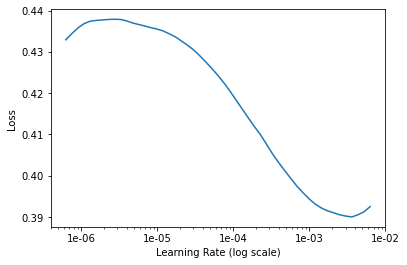

In [67]:
s3_uri = "s3://canopy-production-ml-output/ckpt/pc-tf-custom-container-2021-04-15-20-39-55-928/lr_finder.csv"

df = plot_lr_finder(s3_uri,10,60)

# Sandbox

In [9]:
s3 = boto3.resource('s3')

In [10]:
bucket = "canopy-production-ml-output"
key = "ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844"
my_bucket = s3.Bucket(bucket)
 
h5_files = [obj.key for obj in my_bucket.objects.filter(Prefix=key) if "h5" == obj.key[-2:]]

In [11]:
h5_files

['ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/last_chkpt.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_1.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_10.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_11.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_12.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_13.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_14.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_15.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_16.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_17.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_18.h5',
 'ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_resnet_epoch_19.h5',
 'ckpt/pc-tf-custom-container-2021-04-20

In [36]:
h5_files = h5_files[1:]

In [39]:
h5_files[0].split("_")[-1].split(".")[0]

'1'

In [42]:
max_epoch = max([int(file.split("_")[-1].split('.')[0]) for file in h5_files])

In [50]:
for i,file in enumerate(h5_files):
    file_match = int(file.split("/")[-1].split("_")[-1].split(".")[0])
    if file_match == max_epoch:
        print(h5_files[i])

ckpt/pc-tf-custom-container-2021-04-20-05-19-50-592/model_resnet_epoch_12.h5


In [12]:
d = {}

In [13]:
if d:
    print("hi")

In [14]:
s3 = boto3.resource('s3')
bucket = "canopy-production-ml-output"
my_bucket = s3.Bucket(bucket)
key = "ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844"
h5_files = [obj.key for obj in my_bucket.objects.filter(Prefix=key) if "h5" == obj.key[-2:]]

h5_files_dict = {}

for file in h5_files:
    try:
        match_key = int(file.split('_')[-1].split('.')[0])
        h5_files_dict[match_key] = file
    except:
        continue

In [18]:
h5_files_dict.keys()

dict_keys([1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
s3 = boto3.client('s3')
bucket = "canopy-production-ml-output"
my_bucket = s3.Bucket(bucket)
key = s3_chkpt_dir
h5_files = [obj.key for obj in my_bucket.objects.filter(Prefix=key) if "h5" == obj.key[-2:]]

In [31]:
starting_checkpoint = "ckpt/pc-tf-custom-container-2021-04-20-05-16-47-844/model_weights_very_best.h5"
chkpt_name = 'test.h5'

my_bucket.download_file(starting_checkpoint, chkpt_name)